# Advanced Statistics — Solutions

## Q1: What is hypothesis testing in statistics?

Hypothesis testing is a method that uses sample data to evaluate a claim about a population parameter. It involves proposing H0 (null) and H1 (alternative), picking α, computing a test statistic, and deciding whether data are unlikely under H0.

## Q2: What is the null hypothesis, and how does it differ from the alternative hypothesis?
The null hypothesis (H₀) and alternative hypothesis (H₁ or Ha) are the two competing statements used in hypothesis testing. The null hypothesis is a statement that assumes no effect, no difference, or no relationship exists in the population. The alternative hypothesis is a statement that contradicts the null hypothesis. It represents what the researcher wants to prove — an effect, difference, or relationship exists.

## Q3: Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

The significance level is the maximum probability of making a Type I error — rejecting a true null hypothesis.

Common values:

α = 0.05 (most common)

α = 0.01 (more strict)

α = 0.10 (less strict)

So, if α = 0.05, it means:
You are willing to accept a 5% chance of wrongly rejecting the null hypothesis.

The significance level determines how strong the evidence must be to reject H₀.

## Q4: What are Type I and Type II errors? Give examples of each.
A Type I error α (alpha),  occurs when you reject a true null hypothesis. You conclude that an effect exists when actually it does not.
Example:
A company concludes that a new marketing strategy increases sales, but in reality, it does not.

A Type II error β (beta), occurs when you fail to reject a false null hypothesis. You conclude that no effect exists when actually it does.
Example:
A company concludes that a new marketing strategy does not improve sales, but in reality, it does.


## Q5: What is the difference between a Z-test and a T-test? Explain when to use each.
Z-test: used when population std (σ) is known or Sample size is large. 
T-test: used when population standard deviation (σ) is NOT known and Sample size is small.

## Q6: Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.


sample mean: 4.9688 sample var: 2.507477307730773


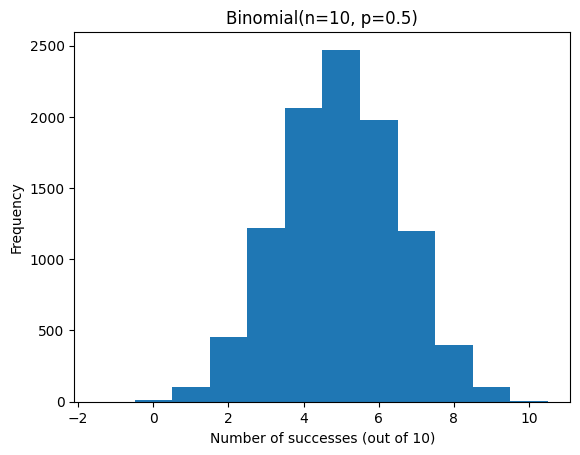

In [1]:
import numpy as np
try:
    import matplotlib.pyplot as plt
except Exception:
    plt = None

n = 10
p = 0.5
samples = 10000
data = np.random.binomial(n, p, size=samples)
print('sample mean:', data.mean(), 'sample var:', data.var(ddof=1))

if plt is None:
    print('\nmatplotlib is not installed. Value counts:')
    u, c = np.unique(data, return_counts=True)
    for uu, cc in zip(u, c):
        print(uu, cc)
else:
    plt.figure()
    plt.hist(data, bins=range(-1, n+2), align='left')
    plt.xlabel('Number of successes (out of 10)')
    plt.ylabel('Frequency')
    plt.title('Binomial(n=10, p=0.5)')
    plt.show()


## Q7: Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.


In [1]:
import numpy as np
from math import sqrt, erf

sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]
x = np.array(sample_data, dtype=float)

n = x.size
xbar = x.mean()
s = x.std(ddof=1)
mu0 = 50.0
sigma = 1.0  # ASSUMPTION: known population std for Z-test
z_stat = (xbar - mu0) / (sigma / sqrt(n))

# normal CDF via erf
def norm_cdf(z):
    return 0.5 * (1 + erf(z / sqrt(2)))

p_two = 2 * (1 - norm_cdf(abs(z_stat)))
print('n =', n)
print('sample mean =', xbar)
print('sample std (sample) =', s)
print('Assumed sigma =', sigma)
print('z-statistic =', z_stat)
print('two-sided p-value =', p_two)

# t-test for comparison (if scipy available)
try:
    from scipy import stats
    tstat, p_t = stats.ttest_1samp(x, popmean=mu0)
    print('\nComparison (one-sample t-test): t-stat =', tstat, 'p-value =', p_t)
except Exception:
    print('\nscipy not available: t-test not computed here (you can compute t-test using scipy.stats.ttest_1samp)')


n = 36
sample mean = 50.08888888888889
sample std (sample) = 0.5365379910807955
Assumed sigma = 1.0
z-statistic = 0.5333333333333314
two-sided p-value = 0.5938028572077039

Comparison (one-sample t-test): t-stat = 0.9940271559503017 p-value = 0.3270325549821643


## Q8: Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


n = 100
sample mean = 5.121165704151398
sample sd (sample) = 1.7792309346248243
standard error = 0.17792309346248242
95% CI = [ 4.772436440964933 , 5.469894967337863 ]


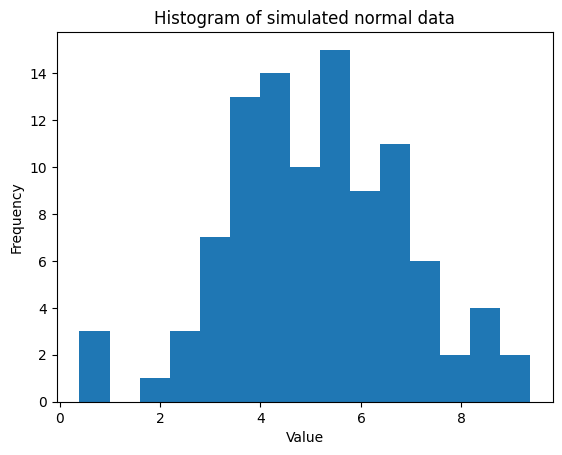

In [3]:
import numpy as np
from math import sqrt

np.random.seed(1)
mu_true = 5.0
sigma_true = 2.0
n = 100
samples = np.random.normal(mu_true, sigma_true, size=n)

xbar = samples.mean()
s = samples.std(ddof=1)
sem = s / sqrt(n)

try:
    from scipy import stats
    tcrit = stats.t.ppf(0.975, df=n-1)
except Exception:
    tcrit = 1.96

ci_low = xbar - tcrit * sem
ci_high = xbar + tcrit * sem
print('n =', n)
print('sample mean =', xbar)
print('sample sd (sample) =', s)
print('standard error =', sem)
print('95% CI = [', ci_low, ',', ci_high, ']')

try:
    import matplotlib.pyplot as plt
    plt.figure()
    plt.hist(samples, bins=15)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of simulated normal data')
    plt.show()
except Exception:
    print('matplotlib not available — histogram skipped')


## Q9: Write a Python function to calculate the Z-scores from a dataset andvisualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.

data = [10, 12, 9, 13, 11, 12, 14, 8, 10, 11]
z-scores = [-0.54772256  0.54772256 -1.09544512  1.09544512  0.          0.54772256
  1.64316767 -1.64316767 -0.54772256  0.        ]

Interpretation: z = +2 means 2 SDs above the mean; z = -1 means 1 SD below the mean.


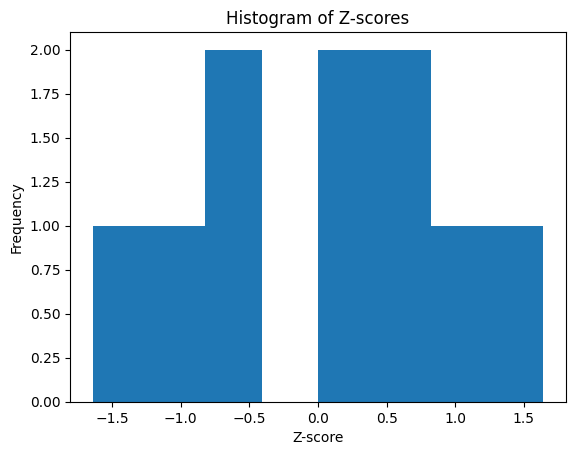

In [4]:
import numpy as np
try:
    import matplotlib.pyplot as plt
except Exception:
    plt = None


def z_scores(data, ddof=1):
    arr = np.array(data, dtype=float)
    mu = arr.mean(); sigma = arr.std(ddof=ddof)
    if sigma == 0:
        return np.zeros_like(arr)
    return (arr - mu) / sigma

# example
data = [10, 12, 9, 13, 11, 12, 14, 8, 10, 11]
zs = z_scores(data)
print('data =', data)
print('z-scores =', zs)
print('\nInterpretation: z = +2 means 2 SDs above the mean; z = -1 means 1 SD below the mean.')

if plt is None:
    print('\nmatplotlib not available — showing rounded z-scores:')
    print(np.round(zs, 2))
else:
    plt.figure()
    plt.hist(zs, bins=8)
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Z-scores')
    plt.show()
